# Linear Regression

## Load Dataset from sklearn

In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
from sklearn.datasets import load_boston 
boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
df = pd.DataFrame(boston.data, columns = boston.feature_names)
df['Target'] = boston.target
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


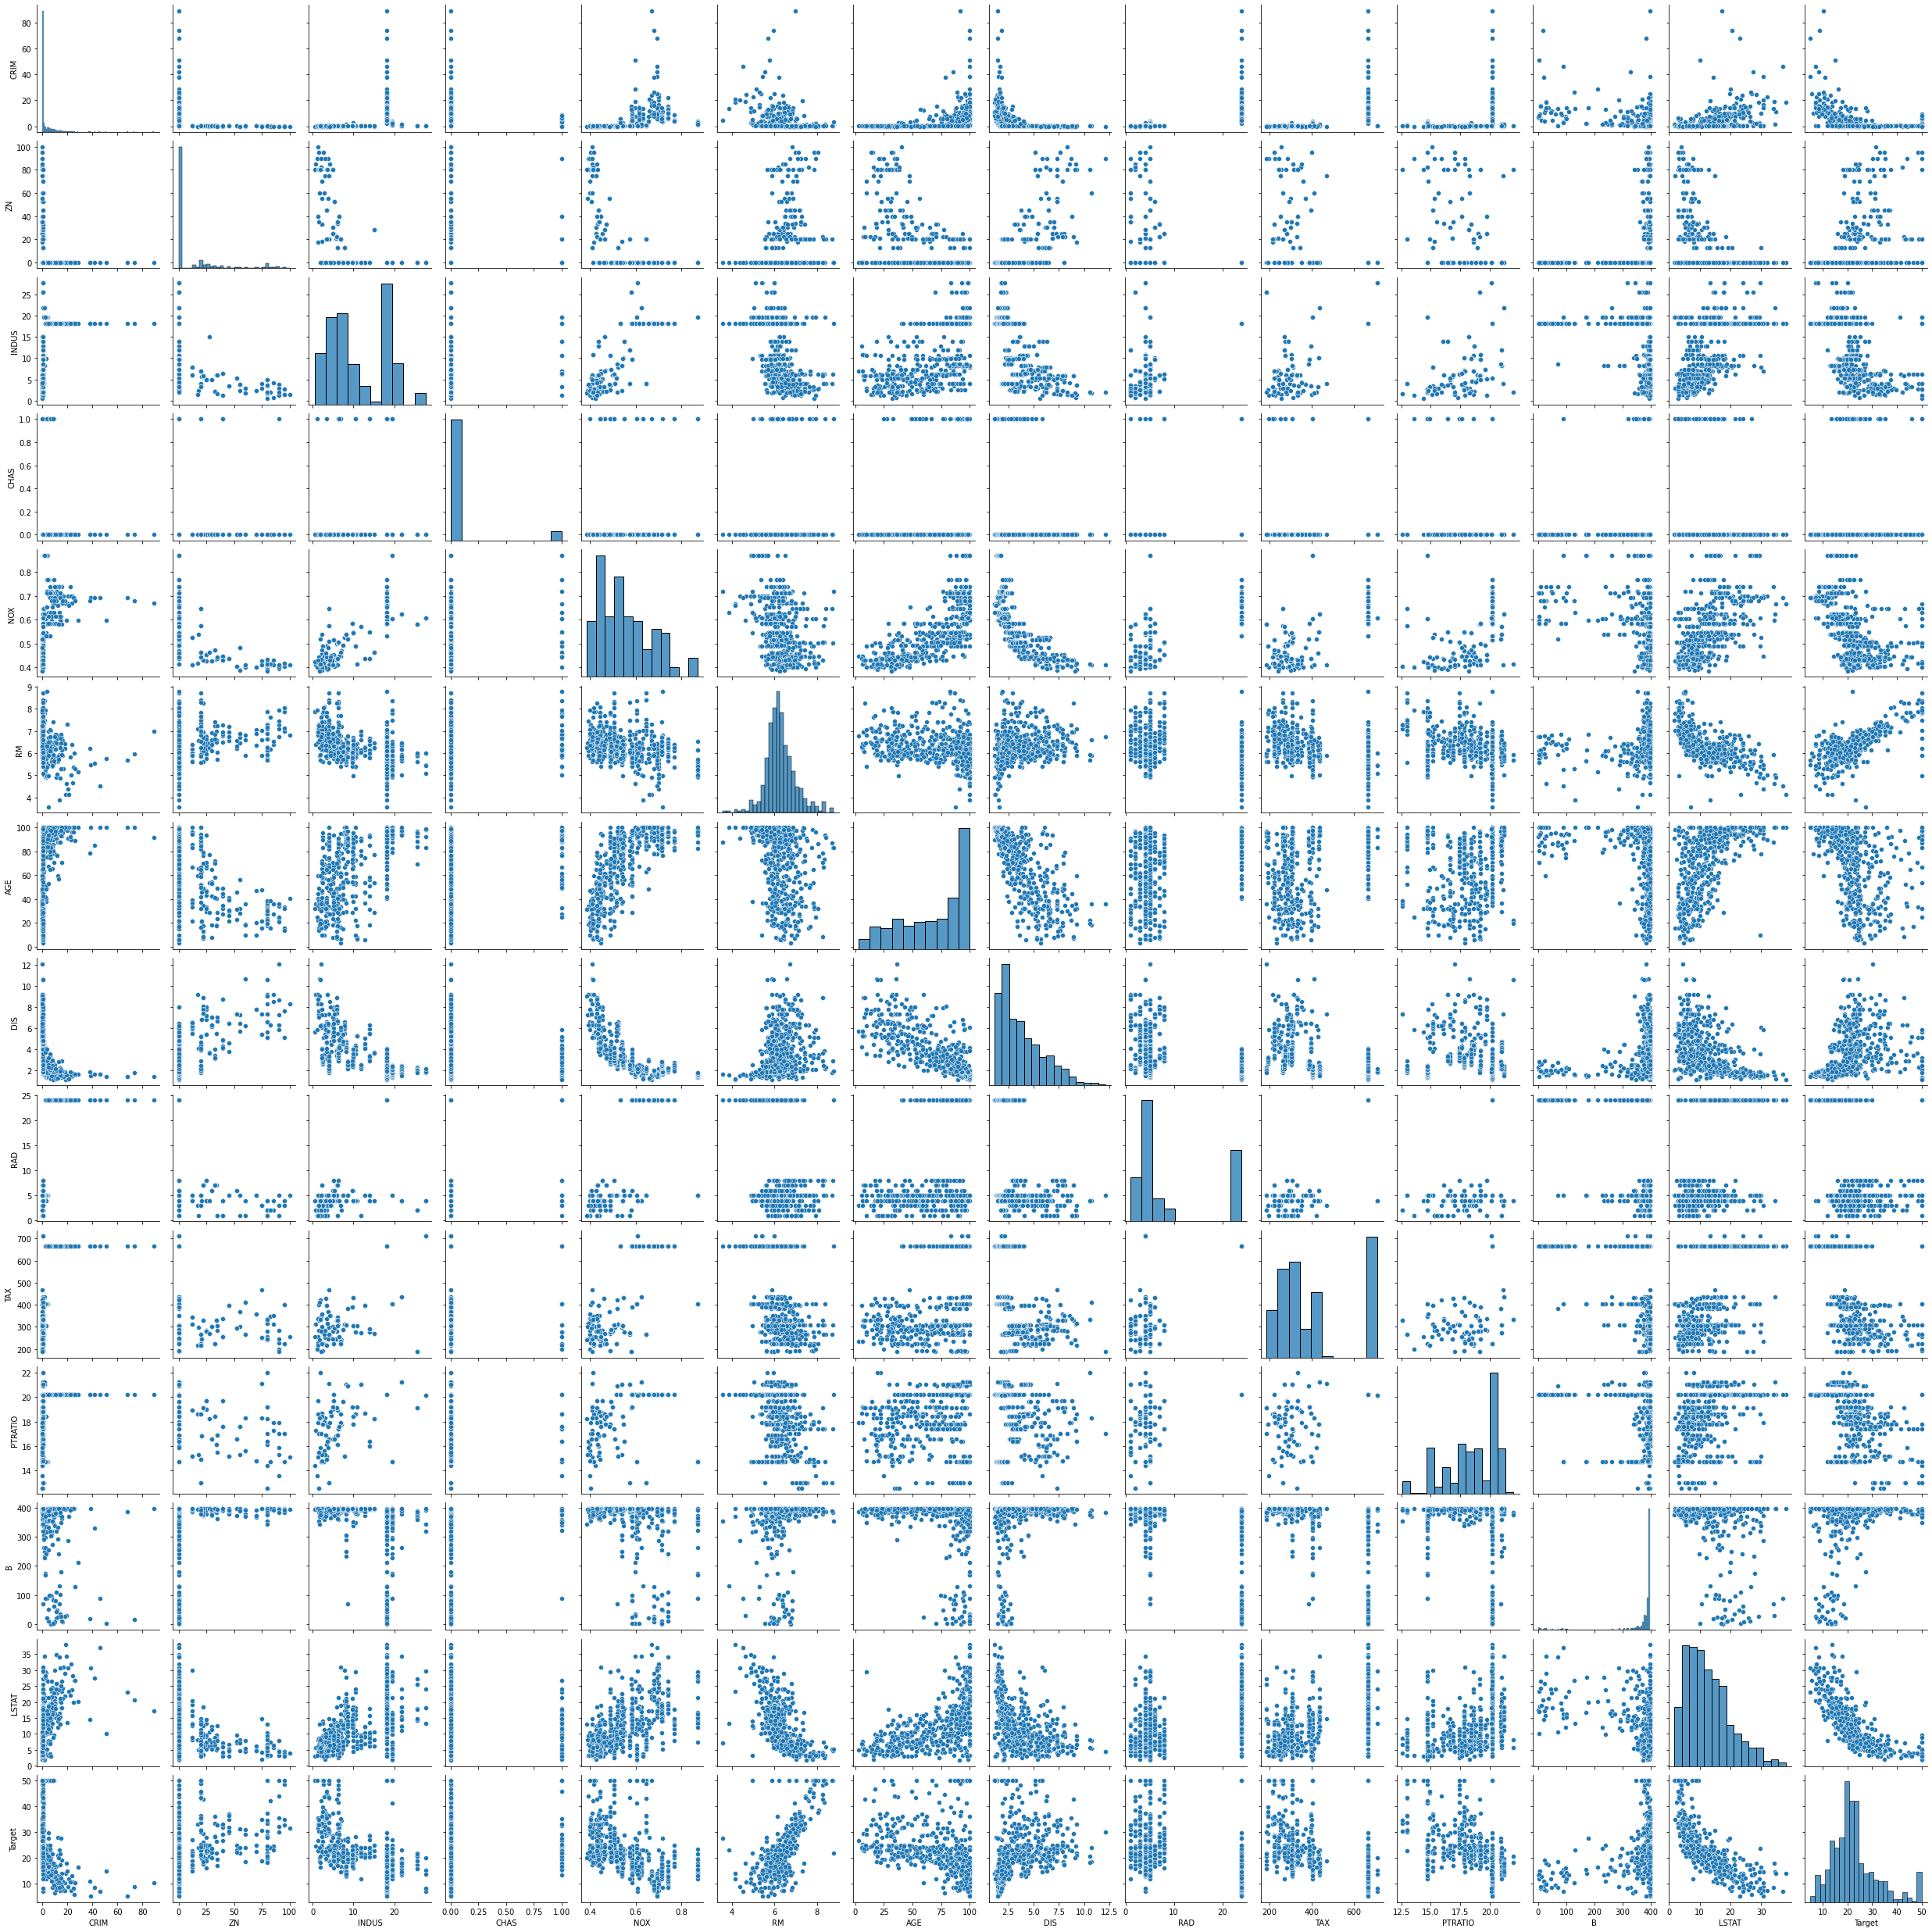

In [4]:
sns.pairplot(df)
plt.show()

In [5]:
cols = ['Target', 'INDUS', 'RM', 'LSTAT', 'NOX' ,'DIS']

In [6]:
df[cols].describe()

,Target,INDUS,RM,LSTAT,NOX,DIS
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.532806,11.136779,6.284634,12.653063,0.554695,3.795043
std,9.197104,6.860353,0.702617,7.141062,0.115878,2.105710
min,5.000000,0.460000,3.561000,1.730000,0.385000,1.129600
25%,17.025000,5.190000,5.885500,6.950000,0.449000,2.100175
50%,21.200000,9.690000,6.208500,11.360000,0.538000,3.207450
75%,25.000000,18.100000,6.623500,16.955000,0.624000,5.188425
max,50.000000,27.740000,8.780000,37.970000,0.871000,12.126500


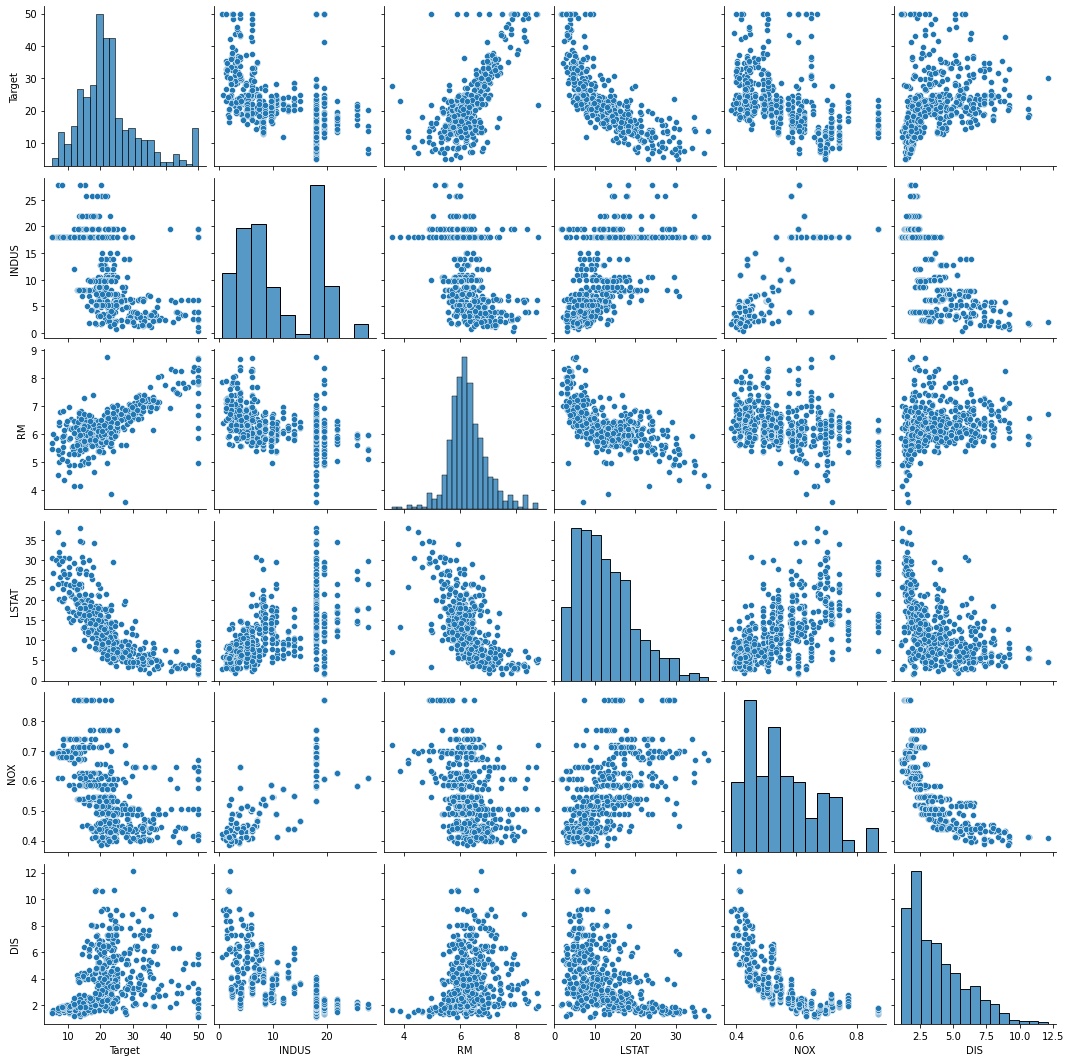

In [7]:
sns.pairplot(df[cols])
plt.show()

## Train Linear Model with PyTorch

In [8]:
import torch
import torch.nn as nn 
import torch.nn.functional as F 
import torch.optim as optim

In [9]:
df[cols].values # data frame에 있는 numpy 값을 return 

array([[24.    ,  2.31  ,  6.575 ,  4.98  ,  0.538 ,  4.09  ],
       [21.6   ,  7.07  ,  6.421 ,  9.14  ,  0.469 ,  4.9671],
       [34.7   ,  7.07  ,  7.185 ,  4.03  ,  0.469 ,  4.9671],
       ...,
       [23.9   , 11.93  ,  6.976 ,  5.64  ,  0.573 ,  2.1675],
       [22.    , 11.93  ,  6.794 ,  6.48  ,  0.573 ,  2.3889],
       [11.9   , 11.93  ,  6.03  ,  7.88  ,  0.573 ,  2.505 ]])

In [10]:
data = torch.from_numpy(df[cols].values).float() # double float -> single float

data.shape

torch.Size([506, 6])

In [11]:
torch.from_numpy(df[cols].values)

tensor([[24.0000,  2.3100,  6.5750,  4.9800,  0.5380,  4.0900],
        [21.6000,  7.0700,  6.4210,  9.1400,  0.4690,  4.9671],
        [34.7000,  7.0700,  7.1850,  4.0300,  0.4690,  4.9671],
        ...,
        [23.9000, 11.9300,  6.9760,  5.6400,  0.5730,  2.1675],
        [22.0000, 11.9300,  6.7940,  6.4800,  0.5730,  2.3889],
        [11.9000, 11.9300,  6.0300,  7.8800,  0.5730,  2.5050]],
       dtype=torch.float64)

In [13]:
# split x and y
y = data[:,:1]
x = data[:,1:]

print(x.shape, y.shape)

torch.Size([506, 5]) torch.Size([506, 1])


In [14]:
# Define configurations 
n_epochs = 1000 # 1,000 iterations 
learning_rate = 1e-3 
print_interval = 100 # 100번에 한 번씩만 print하는 option

In [15]:
# Define model 
model = nn.Linear(x.size(-1), y.size(-1)) # 5차원 -> 1차원 
model 

Linear(in_features=5, out_features=1, bias=True)

In [16]:
# Instead of implement gradient equation
# we can use <optim class> to update model parameters, automatically 
optimizer = optim.SGD(model.parameters(),
                     lr = learning_rate) # model.parameters()를 lr의 learning_rate로 gradient descent 

In [22]:
# Whole training samples are used in 1 epochs.
# Thus, 'N epochs' means that model saw a sample N times.
for i in range(n_epochs) : 
    y_hat = model(x)
    loss = F.mse_loss(y_hat, y)
    
    optimizer.zero_grad() # gradient를 초기화해주지 않으면 이전의 값에 더해짐 i.e, 초기화
    loss.backward() # loss differentiate
    
    optimizer.step() # 계산된 parameter를 통해서 gradient descent 
    
    if (i + 1 ) % print_interval == 0 : 
        print('Epoch %d: loss = %.4e' % (i + 1, loss))

Epoch 100: loss = 2.8972e+01
Epoch 200: loss = 2.8971e+01
Epoch 300: loss = 2.8971e+01
Epoch 400: loss = 2.8970e+01
Epoch 500: loss = 2.8969e+01
Epoch 600: loss = 2.8969e+01
Epoch 700: loss = 2.8968e+01
Epoch 800: loss = 2.8967e+01
Epoch 900: loss = 2.8966e+01
Epoch 1000: loss = 2.8966e+01


# Let's see the result ! 

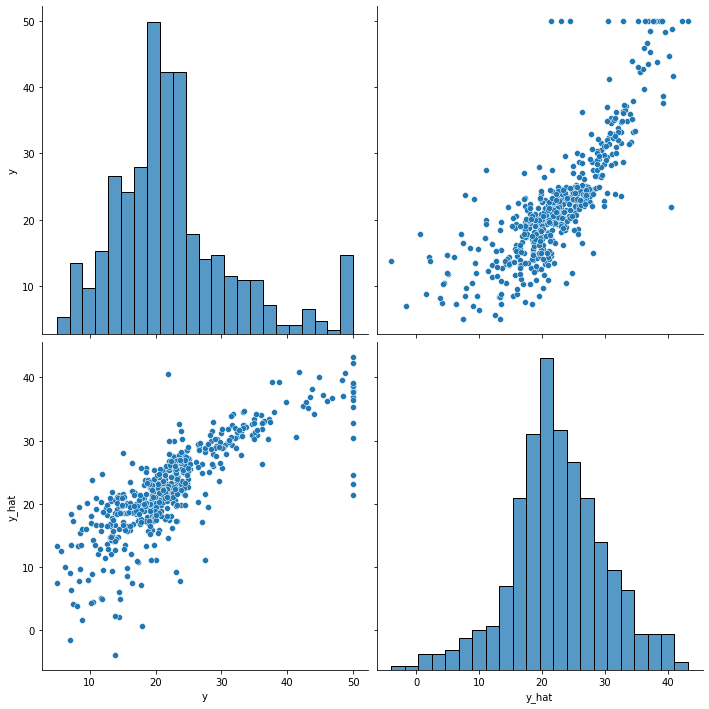

In [23]:
df = pd.DataFrame(torch.cat([y, y_hat], dim = 1).detach_().numpy(),
                  columns = ['y', 'y_hat'])
sns.pairplot(df, height = 5)
plt.show()